#### Author : Jeonghun Yoon

Naive Bayes classifier를 이용하여 영화 리뷰를 예측하는 감정 분류기를 구현하라. 
 - 0 : 부정
 - 1 : 긍정

In [2]:
import pandas as pd

In [8]:
# 영화 리뷰를 load한다. 사랑/장르라는 단어를 포함하고 있는 document를 load 한다.
reviews = pd.read_csv('./inputs/ratings_train.txt', delimiter='\t')

In [12]:
# 데이터 확인
reviews.head(10)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


# EDA

In [10]:
# 데이터의 크기
reviews.shape

(150000, 3)

In [18]:
# Pos VS Neg dataset 개수 비교
reviews.label.value_counts()

0    75173
1    74827
Name: label, dtype: int64

문장 길이의 분포를 살펴보자

In [22]:
import seaborn as sns

In [20]:
reviews['length'] = reviews['document'].apply(lambda x: len(str(x)))

In [21]:
reviews.head()

,id,document,label,length
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


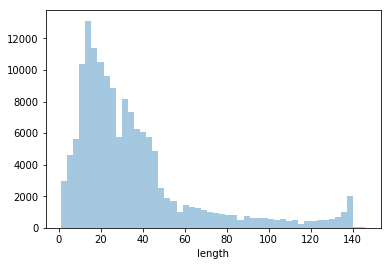

In [26]:
# 전체 분포
sns.distplot(reviews.length, kde=False)

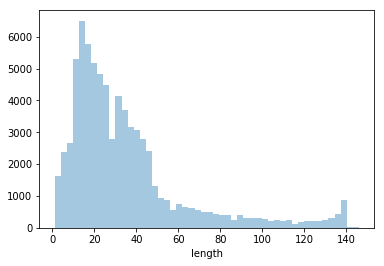

In [29]:
# Positive review에 대한 분포
sns.distplot(reviews[reviews.label==1]['length'], kde=False)

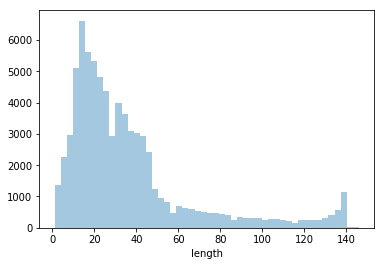

In [30]:
# Positive review에 대한 분포
sns.distplot(reviews[reviews.label==0]['length'], kde=False)

In [31]:
reviews.length.describe()

count    150000.000000
mean         35.203453
std          29.531983
min           1.000000
25%          16.000000
50%          27.000000
75%          42.000000
max         146.000000
Name: length, dtype: float64

In [34]:
reviews[reviews.length == 146]['document'].iloc[0]

'"스폰으로 먹고사는 방송이라 어쩔수 없다고 하지만. 이건 그냥 비현실적인 자동차만;...독일3사&슈퍼카 홍보 프로그램도 아니구.대중적인 자동차 방송으로 이루어 졌으면 합니다. 보는내내 ""카탈로그 책자""를 ""동영상으로 보여주는 방송"" 같아서 씁쓸하네요.!"'

# Text Pre-Processing

In [42]:
# 형태소 분석기
import konlpy
from konlpy.tag import Okt

okt = Okt()

In [46]:
def parse(s):
    try:
        return okt.nouns(s)
    except:
        return []

In [47]:
reviews['parsed_doc'] = reviews.document.apply(parse)

In [48]:
reviews.head()

,id,document,label,length,parsed_doc
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19,"[더빙, 진짜, 목소리]"
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33,"[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기]"
2,10265843,너무재밓었다그래서보는것을추천한다,0,17,"[무재, 밓었, 다그, 래서, 추천]"
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29,"[교도소, 이야기, 구먼, 재미, 평점, 조정]"
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61,"[몬페, 의, 연기, 영화, 스파이더맨, 커스틴, 던스트]"


# Vectorization (Bag-of-Words)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

Bag of words count를 vector로 만든다.

In [52]:
bow_transformer = CountVectorizer(analyzer=parse) \
    .fit(reviews.document)

In [59]:
# Corpus
len(bow_transformer.vocabulary_)

38648

In [55]:
sample = reviews.document.iloc[3]
sample

'교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정'

In [74]:
sample_bow = bow_transformer.transform([sample])

In [75]:
print(sample_bow)

  (0, 2509)	1
  (0, 2630)	1
  (0, 26019)	1
  (0, 27667)	1
  (0, 29259)	1
  (0, 35255)	1


In [65]:
print(bow_transformer.get_feature_names()[2509])
print(bow_transformer.get_feature_names()[2630])
print(bow_transformer.get_feature_names()[26019])

교도소
구먼
이야기


In [66]:
reviews_bow = bow_transformer.transform(reviews.document)

In [68]:
# Sparse matrix의 크기
reviews_bow.shape

(150000, 38648)

In [69]:
# Non-zero의 발생 횟수
reviews_bow.nnz

847810

In [73]:
# Sparsity
sparsity = 100.0 * \
    reviews_bow.nnz / (reviews_bow.shape[0] * reviews_bow.shape[1])
print(round(sparsity, 3))

0.015


# Normalization of vector (TF-IDF)

In [76]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(reviews_bow)

In [77]:
sample_tfidf = tfidf_transformer.transform(sample_bow)
print(sample_tfidf)

  (0, 35255)	0.2229955053854873
  (0, 29259)	0.48387295041594
  (0, 27667)	0.24505937911070386
  (0, 26019)	0.27807555746194873
  (0, 2630)	0.5469932440848155
  (0, 2509)	0.5287326814292047


In [78]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['교도소']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['이야기']])

10.08518389566662
5.304085093270837
